<a href="https://colab.research.google.com/github/ShamankaA/math_prog/blob/main/3.%20%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8%20(CNN).%20%D0%9A%D0%BE%D0%BB%D0%B1%D1%8D%D0%BA%D0%B8.%20%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

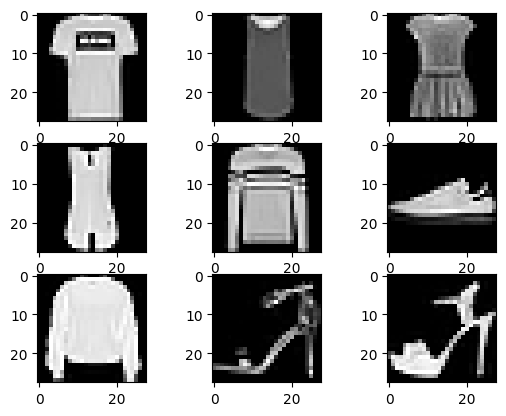

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 1.5. Обучаем модель

In [5]:
trainX_norm = trainX.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
testX_norm = testX.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

history = model.fit(trainX_norm, trainy,
                    validation_data=(testX_norm, testy),
                    epochs=10,
                    batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7530 - loss: 0.6906 - val_accuracy: 0.8649 - val_loss: 0.3764
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8792 - loss: 0.3301 - val_accuracy: 0.8876 - val_loss: 0.3093
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8981 - loss: 0.2803 - val_accuracy: 0.8945 - val_loss: 0.2938
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9105 - loss: 0.2438 - val_accuracy: 0.8864 - val_loss: 0.3076
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9174 - loss: 0.2269 - val_accuracy: 0.9015 - val_loss: 0.2670
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9268 - loss: 0.1977 - val_accuracy: 0.9092 - val_loss: 0.2474
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9332 - loss: 0.1805 - val_accuracy: 0.9077 - val_loss: 0.2523
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9410 - loss: 0.1584 - val_accuracy: 0

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

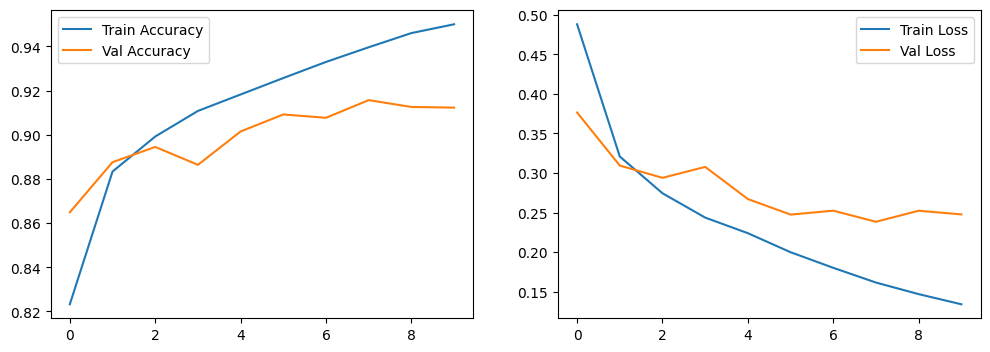

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [7]:
from keras.models import load_model
import pickle

model.save('model_fashion.keras')


In [8]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Применяем к целевой переменной trainy
encoded_labels = label_encoder.fit_transform(trainy)

# Выводим названия классов
print(label_encoder.classes_)

[0 1 2 3 4 5 6 7 8 9]


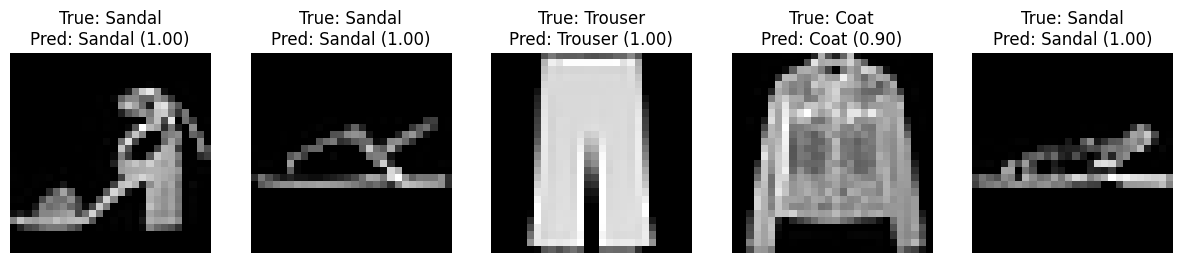

In [11]:
# 1.7. Исправленная версия с оптимизацией предсказаний
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Метки классов Fashion MNIST
labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Загружаем модель один раз при инициализации
model = load_model('model_fashion.keras')

# Создаем оптимизированную функцию предсказания
@tf.function(reduce_retracing=True)
def predict(image):
    return model(image)

def preprocess_image(image):
    """Подготовка изображения к формату модели"""
    # Если изображение из тестовой выборки
    if image.shape == (28, 28):
        return image.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # Конвертация для загруженных изображений
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28))
    return image.reshape(1, 28, 28, 1).astype('float32') / 255.0

# Пример использования с тестовыми данными
plt.figure(figsize=(15, 7))
for i in range(5):
    idx = np.random.randint(0, testX.shape[0])
    image = testX[idx]

    # Предобработка и предсказание
    processed_img = preprocess_image(image)
    preds = predict(processed_img).numpy()[0]

    # Визуализация
    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {labels[testy[idx]]}\nPred: {labels[np.argmax(preds)]} ({np.max(preds):.2f})")
    plt.axis('off')

plt.show()

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [13]:
import kagglehub
path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")
path
dataset_path = "/root/.cache/kagglehub/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda/versions/1"

from imutils import paths
import cv2
import os
import numpy as np
import random

# Выбираем классы из датасета
allowed_classes = ['dogs', 'cats', 'panda']

# Получаем пути к изображениям
imagePaths = list(paths.list_images(dataset_path))
imagePaths = [p for p in imagePaths if p.split(os.path.sep)[-2] in allowed_classes]
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    # Загрузка и обработка изображения
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    image = image.flatten()  # Преобразуем в 1D-вектор
    data.append(image)

    # Извлечение метки класса
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# Проверка наличия данных перед преобразованием
if len(labels) == 0:
    raise ValueError("Метки для обучения отсутствуют! Проверьте загрузку данных.")

# Преобразование меток в one-hot формат
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# Проверка корректности преобразования
if labels.shape[0] == 0:
    raise ValueError("Ошибка преобразования меток. Нет данных для обучения.")

# Разделение данных с проверкой стратификации
(trainX, testX, trainY, testY) = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42,
    stratify=labels  # Убедитесь, что все классы присутствуют в данных
)

# Проверка результатов разделения
if trainX.shape[0] == 0 or testX.shape[0] == 0:
    raise ValueError("Ошибка разделения данных. Проверьте размер выборки.")

100%|██████████| 376M/376M [00:02<00:00, 152MB/s]

Extracting files...


In [14]:
# 2.1 Создание модели для собственного датасета

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Создаем генератор данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Загружаем данные
train_generator = train_datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda/versions/1',  # Путь к тренировочным данным
    target_size=(64, 64),      # Размер изображений
    batch_size=32,
    class_mode='categorical'   # Режим классификации
)

# Создаем архитектуру модели
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Компилируем модель
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Выводим информацию о модели
model.summary()

Found 6006 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [15]:
# 2.2 Реализация модели, вдохновленной ResNet (исправленная версия)
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Add, Activation, Dense, Flatten

def residual_block(x, filters):
    shortcut = x
    # Основной путь
    x = Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = Conv2D(filters, (3,3), padding='same')(x)

    # Проверка совпадения размерностей
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv2D(filters, (1,1), padding='same')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Создаем улучшенную модель
inputs = Input(shape=(64,64,3))

# Начальные слои
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2,2))(x)  # 32x32

# Residual-блоки
x = residual_block(x, 64)    # 32x32x64
x = MaxPooling2D((2,2))(x)  # 16x16x64
x = residual_block(x, 128)   # 16x16x128

# Финальные слои
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

resnet_model = tf.keras.Model(inputs, outputs)
resnet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
resnet_model.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d_5[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │      2,112 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ conv2d_6[0][0],   │
│                     │ 64)               │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │      8,320 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 16, 16,    │          0 │ conv2d_9[0][0],   │
│                     │ 128)              │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 16, 16,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 32768)     │          0 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │  8,388,864 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │        771 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,677,827 (33.10 MB)

 Trainable params: 8,677,827 (33.10 MB)

 Non-trainable params: 0 (0.00 B)

## 2.3. Сохраните полученные модели

In [16]:
model.save('simple_cnn.keras')  # Модель из 2.1
resnet_model.save('resnet_style.keras')

## 2.4. Загрузите обученную модель из прошлой практической работы


In [19]:
old_model = tf.keras.models.load_model('/content/best_model.h5')


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

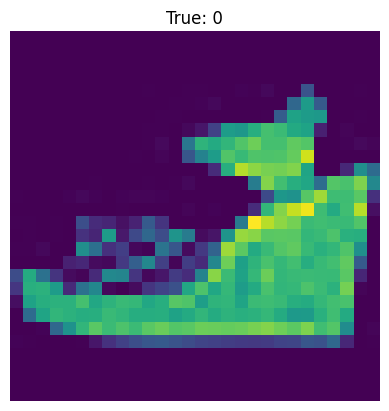

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step
Class	Model1	Model2	Model3
cats	0.70414	0.00200	0.34651
dogs	0.07591	0.00000	0.33651
panda	0.21995	0.00001	0.31698
Result:	0	5	0



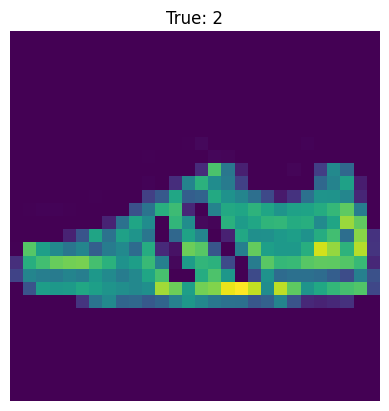

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Class	Model1	Model2	Model3
cats	0.11049	0.00000	0.32730
dogs	0.04690	0.00000	0.34697
panda	0.84261	0.00000	0.32573
Result:	2	7	1



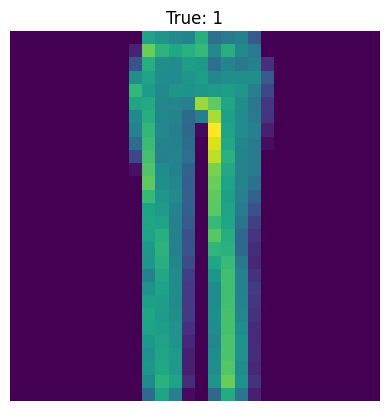

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Class	Model1	Model2	Model3
cats	0.00027	0.00000	0.34429
dogs	0.00408	1.00000	0.34233
panda	0.99565	0.00000	0.31338
Result:	2	1	0



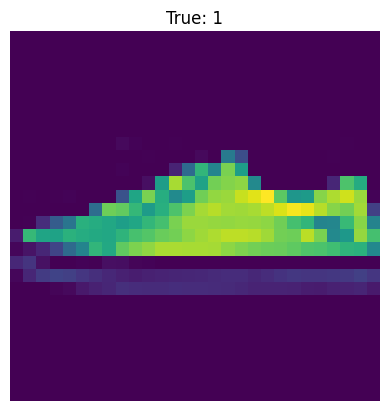

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Class	Model1	Model2	Model3
cats	0.00423	0.00000	0.33162
dogs	0.00424	0.00000	0.35752
panda	0.99153	0.00000	0.31086
Result:	2	7	1



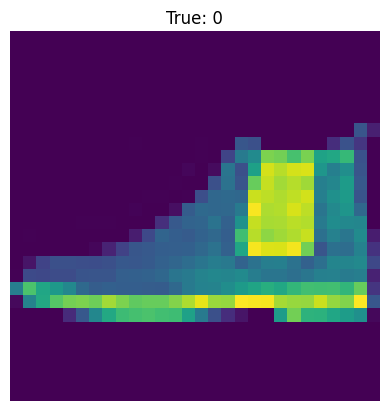

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.20783	0.00000	0.34107
dogs	0.05223	0.00000	0.33544
panda	0.73994	0.00000	0.32349
Result:	2	9	0



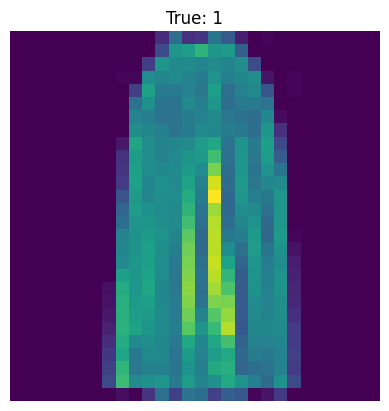

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.63978	0.00078	0.33614
dogs	0.35828	0.92917	0.35093
panda	0.00194	0.00146	0.31292
Result:	0	1	1



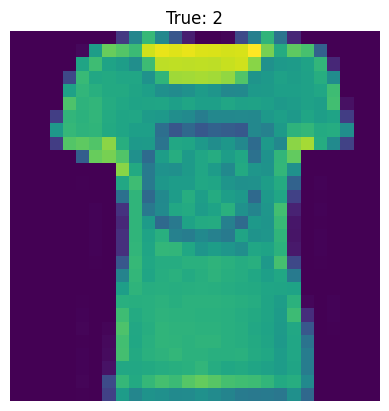

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class	Model1	Model2	Model3
cats	0.21835	0.99977	0.35798
dogs	0.78104	0.00000	0.35559
panda	0.00062	0.00000	0.28643
Result:	1	0	0



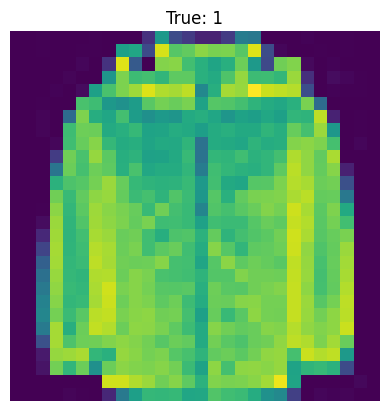

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.88742	0.00004	0.34714
dogs	0.11258	0.00002	0.37293
panda	0.00000	0.00082	0.27993
Result:	0	4	1



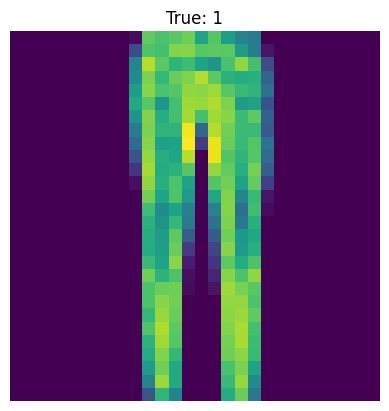

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Class	Model1	Model2	Model3
cats	0.00000	0.00000	0.34683
dogs	0.00002	1.00000	0.33902
panda	0.99998	0.00000	0.31415
Result:	2	1	0



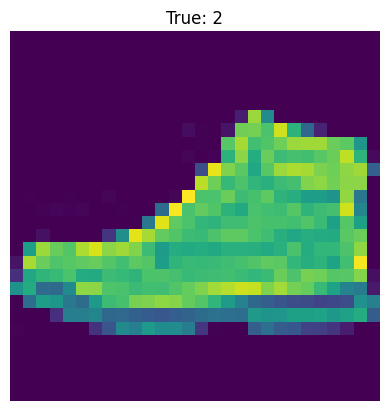

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.53206	0.00001	0.34556
dogs	0.06553	0.00000	0.35281
panda	0.40242	0.00000	0.30162
Result:	0	9	1



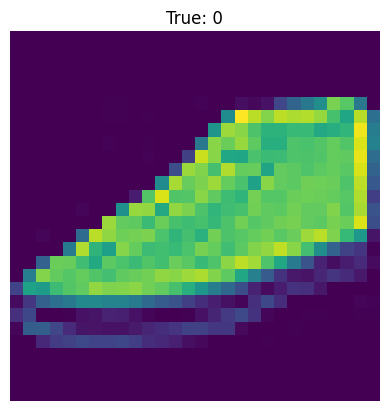

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.09521	0.00001	0.34104
dogs	0.08923	0.00000	0.34869
panda	0.81556	0.00000	0.31027
Result:	2	7	1



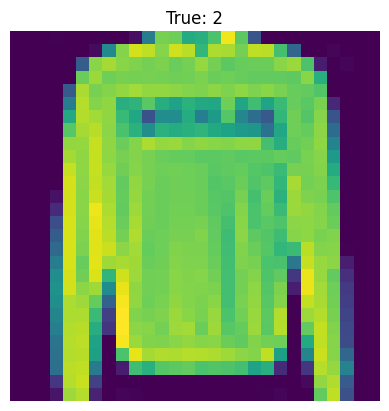

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Class	Model1	Model2	Model3
cats	0.24561	0.00002	0.35490
dogs	0.75439	0.00000	0.36825
panda	0.00001	0.99973	0.27685
Result:	1	2	1



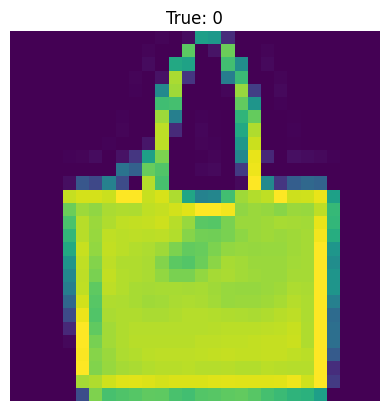

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Class	Model1	Model2	Model3
cats	0.97396	0.00000	0.37215
dogs	0.02604	0.00000	0.34925
panda	0.00000	0.00000	0.27860
Result:	0	8	0



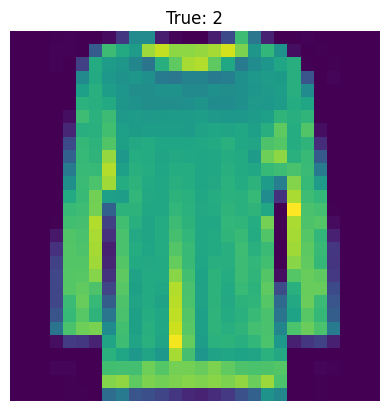

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Class	Model1	Model2	Model3
cats	0.88840	0.10798	0.34932
dogs	0.11160	0.00000	0.35656
panda	0.00000	0.87254	0.29412
Result:	0	2	1



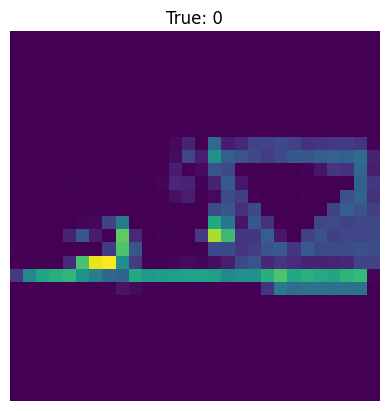

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class	Model1	Model2	Model3
cats	0.00394	0.00000	0.33107
dogs	0.01028	0.00000	0.34402
panda	0.98578	0.00000	0.32491
Result:	2	5	1



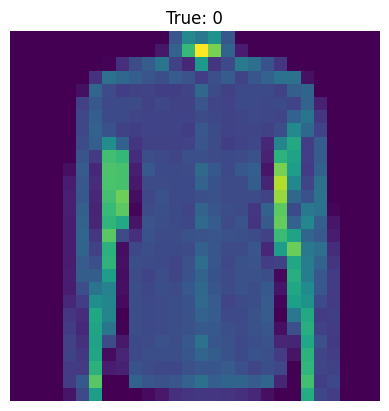

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Class	Model1	Model2	Model3
cats	0.40198	0.00000	0.35186
dogs	0.57368	0.00000	0.35090
panda	0.02434	0.00060	0.29725
Result:	1	6	0



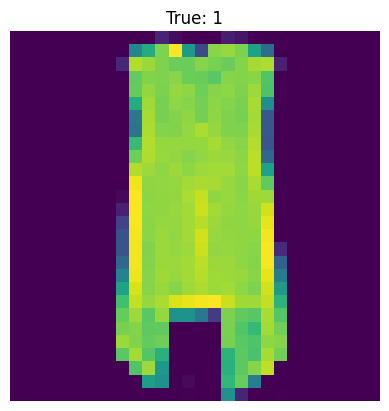

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Class	Model1	Model2	Model3
cats	0.01628	0.08807	0.34452
dogs	0.91478	0.00840	0.35337
panda	0.06893	0.00037	0.30211
Result:	1	6	1



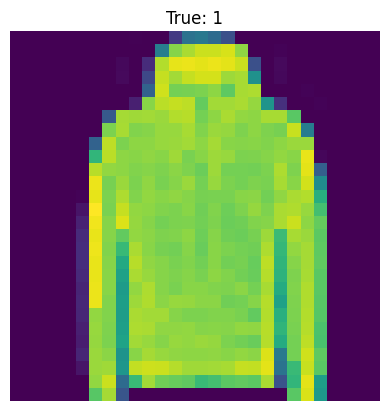

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Class	Model1	Model2	Model3
cats	0.23857	0.00001	0.37935
dogs	0.76137	0.00005	0.34010
panda	0.00006	0.02426	0.28056
Result:	1	4	0



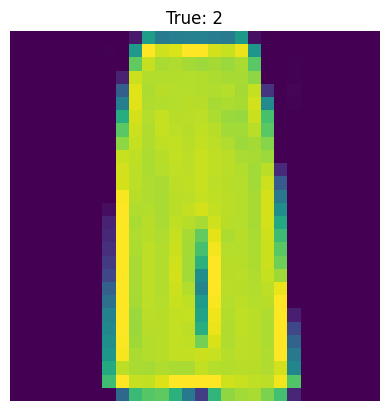

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Class	Model1	Model2	Model3
cats	0.23373	0.00005	0.35336
dogs	0.76626	0.99958	0.34833
panda	0.00001	0.00001	0.29831
Result:	1	1	0



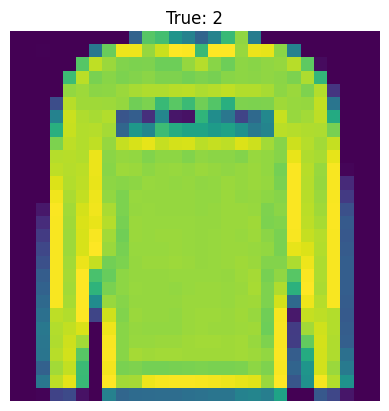

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Class	Model1	Model2	Model3
cats	0.84972	0.00001	0.34956
dogs	0.15028	0.00000	0.37896
panda	0.00000	0.99999	0.27148
Result:	0	2	1



In [41]:
# Загружаем модели один раз перед циклом
model_1 = load_model('/content/best_model.h5')
model_2 = load_model('/content/model_fashion.keras')  # Ожидает (28, 28, 1)
model_3 = load_model('/content/resnet_style.keras')

def predict_class(image, labels):
    # Определяем реальные входные формы для моделей
    MODEL1_SHAPE = (32, 32, 3)  # Пример для model_1 (RGB)
    MODEL2_SHAPE = (28, 28, 1)  # Исправлено для model_2 (Grayscale)
    MODEL3_SHAPE = (64, 64, 3)  # Пример для model_3 (RGB)

    # Преобразование для model_1
    img1 = tf.image.resize(image, MODEL1_SHAPE[:2])
    if img1.shape[-1] != MODEL1_SHAPE[-1]:
        img1 = tf.image.grayscale_to_rgb(img1)
    img1_flat = img1.numpy().reshape(1, -1)

    # Преобразование для model_2
    img2 = tf.image.resize(image, MODEL2_SHAPE[:2])
    if img2.shape[-1] != MODEL2_SHAPE[-1]:
        img2 = tf.image.rgb_to_grayscale(img2)
    img2 = img2.numpy().reshape(1, *MODEL2_SHAPE)  # Форма (1, 28, 28, 1)

    # Преобразование для model_3
    img3 = tf.image.resize(image, MODEL3_SHAPE[:2])
    if img3.shape[-1] != MODEL3_SHAPE[-1]:
        img3 = tf.image.grayscale_to_rgb(img3)
    img3 = img3.numpy().reshape(1, *MODEL3_SHAPE)

    # Делаем предсказания
    pred1 = model_1.predict(img1_flat)[0]
    pred2 = model_2.predict(img2)[0]  # Подаем 4D-тензор (1,28,28,1)
    pred3 = model_3.predict(img3)[0]

    # Вывод результатов
    print('Class\tModel1\tModel2\tModel3')
    for i in range(len(pred1)):
        print(f'{labels.classes_[i]}\t{pred1[i]:.5f}\t{pred2[i]:.5f}\t{pred3[i]:.5f}')
    print(f'Result:\t{pred1.argmax()}\t{pred2.argmax()}\t{pred3.argmax()}\n')

# Визуализация и предсказания
for i in range(20):
    img = trainX_norm[num[i]]
    plt.imshow(img[:, :, ::-1])
    plt.title(f'True: {trainY[num[i]].argmax()}')
    plt.axis('off')
    plt.show()
    predict_class(img, lb)

In [42]:
print(len(animal_pred1))
print(len(animal_classes))

2
3


# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [43]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [44]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [45]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

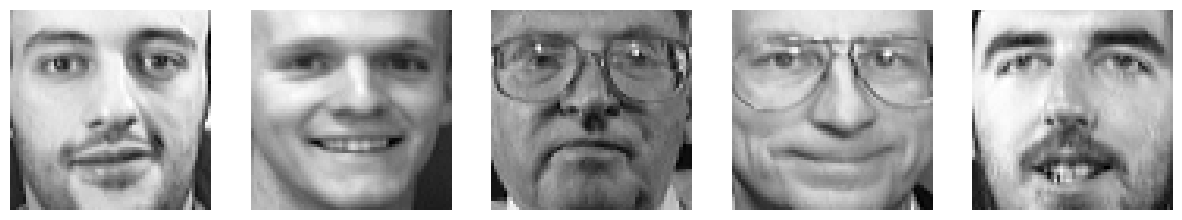

In [46]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [47]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [49]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

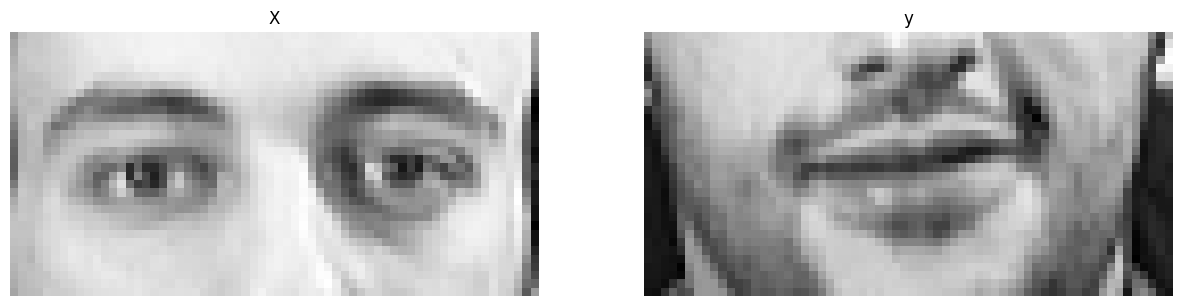

In [48]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [50]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(32, 64, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2048, activation='sigmoid')
])

model.summary()

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
# Ваш код здесь

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь

Отрисуйте все предсказания.

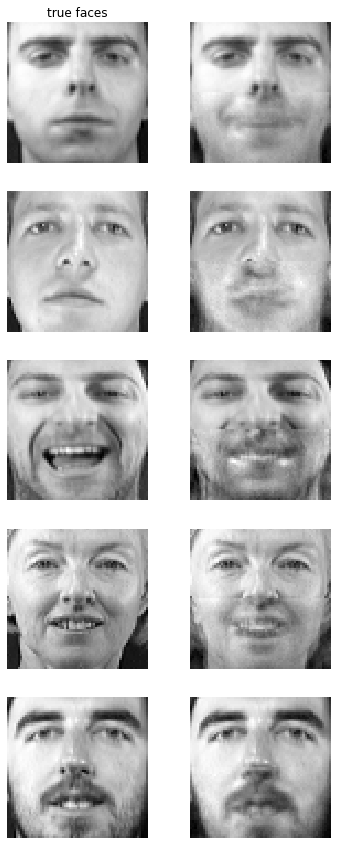

In [ ]:
# Пример кода:

n_faces = 5
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(5):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )